In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
pd.set_option('display.max_columns', 500)

In [1]:
%ls

both-tabs-and-commas-screencap.png      nyc_building_nonsales.csv
data-munging.ipynb                      nyc_building_sales.csv
data-scribbles.ipynb                    nyc_pluto.csv
data-visualization.ipynb                rolling-sales-data-excel-screencap.png
largest_private_landowners.p            wealthiest_private_landowners.p
most_enumerate_private_landowners.p


In [4]:
# pluto = pd.read_csv('nyc_pluto.csv', index_col=0)

In [5]:
# pluto.head(5)

In [6]:
data = pd.read_csv('nyc_building_sales.csv', index_col=0)

/Users/Honors/anaconda/envs/nyc-buildings/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,22,24,25,66,67,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data['Borough'].value_counts()

Queens           9938
Brooklyn         7959
Staten Island    3876
Bronx            3024
Manhattan        1113
Name: Borough, dtype: int64

In [8]:
data.head(5)

,Borough,Block,Lot,SalePrice,LandSquareFeet,MarketValueSqFt,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,CurFvT,NewFvT,CuravtA,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Bronx,2278.0,23.0,499000.0,1667.0,215.086207,201.0,19.0,1010.0,7.0,8.0,10454.0,E060,40.0,4700.0,430 EAST 134 STREET,M1-2/R6A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,M1-2/R6A/MX-1,NaN,N,B1,1.0,0.0,NaN,"SILVERSTEIN, ADAM",1667.0,2320.0,0.0,2320.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,2.0,2.0,2.0,16.67,100.0,16.67,40.0,NaN,3.0,N,5.0,1.0,4746.0,9751.0,0.0,0.0,1901.0,E,0.0,0.0,NaN,NaN,1.39,3.00,2.0,3.0,2.0,2.022780e+09,0.0,19.0,1005372.0,232886.0,6a,NaN,209S013,20901.0,NaN,0.0,NaN,1.0,15v1,378000.0,450000.0,9751.0,4.203017,162.931034,193.965517
1,Bronx,2278.0,35.0,158000.0,1808.0,65.020576,201.0,19.0,1010.0,7.0,8.0,10454.0,E060,40.0,4700.0,454 EAST 134 STREET,M1-2/R6A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,M1-2/R6A/MX-1,NaN,N,A5,1.0,0.0,NaN,"TRASORAS, DAVID",1808.0,2430.0,0.0,2430.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,3.0,1.0,1.0,18.08,100.0,18.08,45.0,NaN,3.0,N,5.0,2.0,3631.0,8907.0,0.0,0.0,1901.0,E,0.0,0.0,NaN,NaN,1.34,3.00,2.0,3.0,2.0,2.022780e+09,0.0,19.0,1005560.0,232782.0,6a,NaN,209S013,20901.0,NaN,0.0,NaN,1.0,15v1,363000.0,400000.0,8907.0,3.665432,149.382716,164.609053
2,Bronx,2278.0,39.0,363000.0,1667.0,148.223765,201.0,19.0,1010.0,7.0,8.0,10454.0,E060,40.0,4700.0,462 EAST 134 STREET,M1-2/R6A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,M1-2/R6A/MX-1,NaN,N,C0,2.0,0.0,NaN,BRONX LUXURY INVESTOR,1667.0,2449.0,0.0,2449.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,2.0,3.0,3.0,16.67,100.0,16.83,45.0,E,3.0,N,5.0,2.0,4638.0,9379.0,0.0,0.0,1901.0,E,0.0,0.0,NaN,NaN,1.47,3.00,2.0,3.0,2.0,2.022780e+09,0.0,19.0,1005620.0,232749.0,6a,NaN,209S013,20901.0,NaN,0.0,NaN,1.0,15v1,366000.0,464000.0,9379.0,3.829726,149.448755,189.465088
3,Bronx,2278.0,46.0,50000.0,1020.0,22.321429,201.0,19.0,1010.0,7.0,8.0,10454.0,E060,40.0,4700.0,476 EAST 134 STREET,M1-2/R6A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,M1-2/R6A/MX-1,NaN,N,A5,1.0,0.0,NaN,CHARLES WHITE,1020.0,2240.0,0.0,2240.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,3.0,1.0,1.0,17.00,60.0,16.50,35.0,NaN,2.0,N,5.0,2.0,2191.0,6966.0,0.0,0.0,1901.0,E,2002.0,0.0,NaN,NaN,2.20,3.00,2.0,3.0,2.0,2.022780e+09,0.0,19.0,1005733.0,232708.0,6a,NaN,209S013,20901.0,NaN,0.0,NaN,1.0,15v1,337000.0,369000.0,6966.0,3.109821,150.446429,164.732143
4,Bronx,2280.0,12.0,405000.0,1422.0,208.333333,201.0,25.0,5002.0,7.0,8.0,10454.0,E060,40.0,4500.0,408 EAST 136 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R6,NaN,N,A5,1.0,0.0,NaN,VELASCO ALICIA,1422.0,1944.0,0.0,1944.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,2.0,1.0,1.0,18.00,79.0,18.00,36.0,NaN,2.0,N,5.0,1.0,3478.0,8133.0,0.0,0.0,1901.0,E,0.0,0.0,Bertine Block,NaN,1.37,2.43,0.0,4.8,2.0,2.022800e+09,0.0,25.0,1005433.0,233458.0,6a,NaN,209S014,20901.0,NaN,0.0,NaN,1.0,15v1,311000.0,369000.0,8133.0,4.183642,159.979424,189.814815


In [9]:
%matplotlib inline

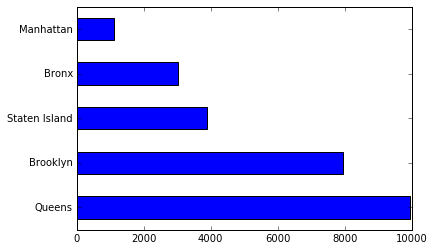

In [10]:
data['Borough'].value_counts().plot(kind='barh')

The difference between the number of buildings sold in Queens and the number sold in Brooklyn is surprising.

In [11]:
# data.groupby('Borough')

In [12]:
# help(pd.groupby)

In [13]:
import missingno as msno

In [14]:
import matplotlib.pyplot as plt

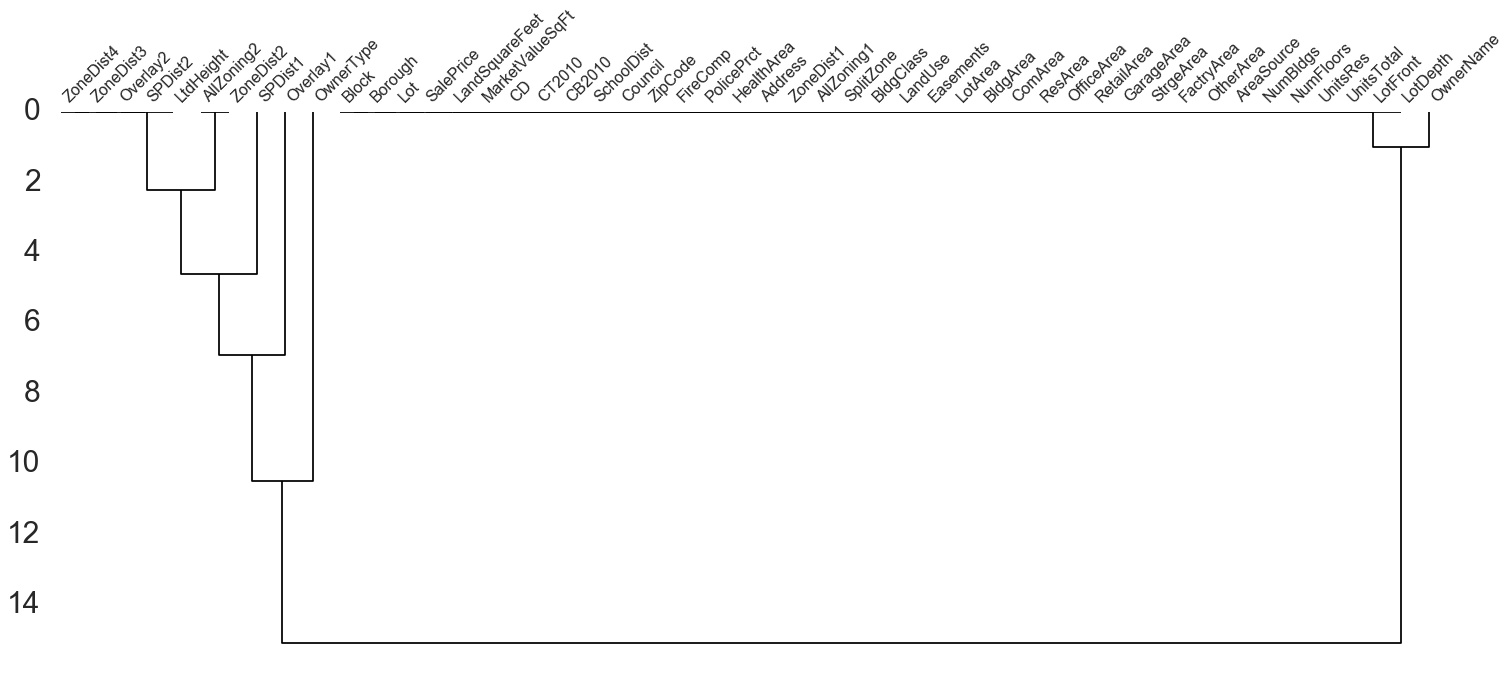

In [15]:
mat = msno.dendrogram(data.ix[1:250, 0:50], inline=False)
mat.axes[0].tick_params(axis='y', labelsize=30)

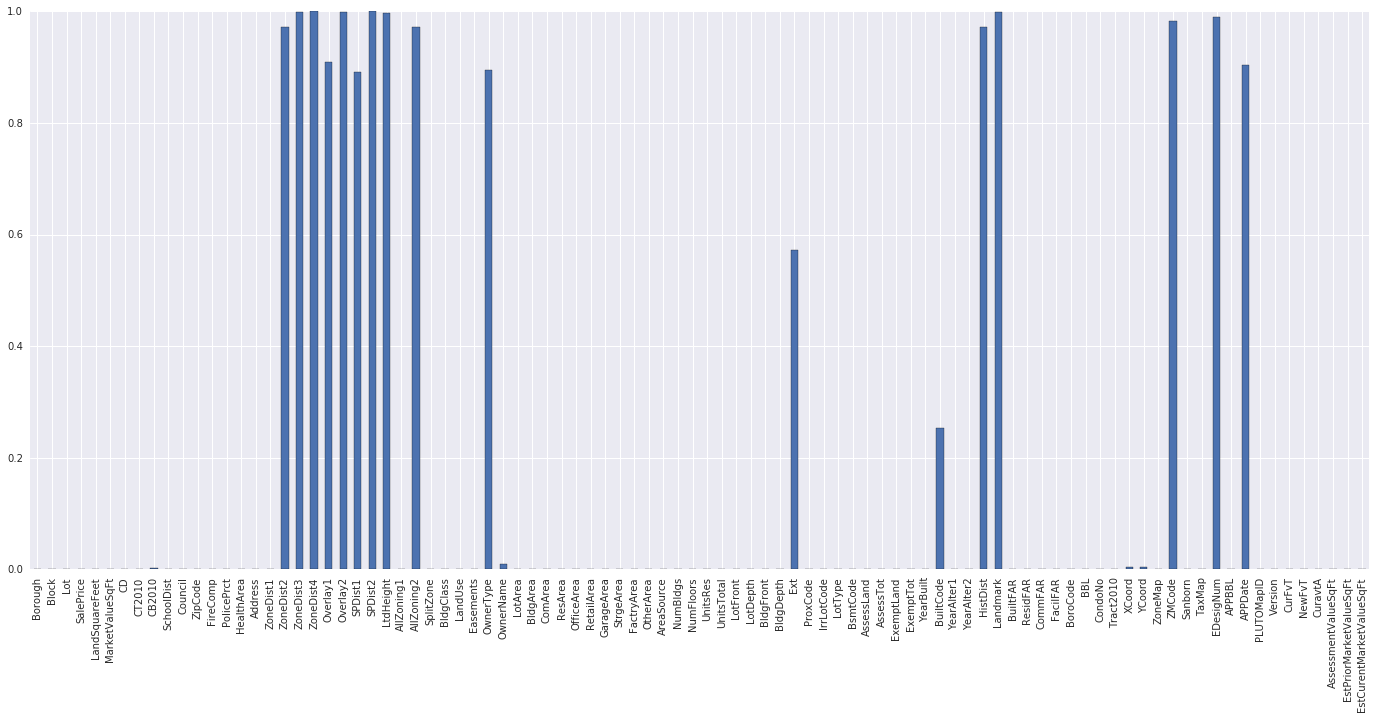

In [16]:
(data.isnull().sum() / len(data)).plot(kind='bar', figsize=(24, 10))

`apply` can return not only singulars but also `Series`!

In [17]:
data.ix[:, ['Block', 'Lot']].apply(lambda x: pd.Series([x.min(), x.max()]))

,Block,Lot
0,7.0,1.0
1,16322.0,7515.0


Using `idxmax` to find the lot in the record with the highest block number.

In [18]:
data.iloc[data['Block'].idxmax()]

Borough                           Staten Island
Block                                       250
Lot                                          53
SalePrice                                640000
LandSquareFeet                             7800
MarketValueSqFt                         266.667
CD                                          501
CT2010                                       59
CB2010                                     2000
SchoolDist                                   31
Council                                      49
ZipCode                                   10301
FireComp                                   E156
PolicePrct                                  120
HealthArea                                  400
Address                     86 UNIVERSITY PLACE
ZoneDist1                                   R3X
ZoneDist2                                   NaN
ZoneDist3                                   NaN
ZoneDist4                                   NaN
Overlay1                                

In [19]:
data = data.sort_values(by = 'SalePrice', ascending=False)

In [20]:
data.tail(10)[::-1][['SalePrice', 'Address', 'AssessmentValueSqFt', 'EstPriorMarketValueSqFt',
                     'EstCurentMarketValueSqFt', 'MarketValueSqFt']]

,SalePrice,Address,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt,MarketValueSqFt
Index,,,,,,
21958,20600.0,166 BEACH 26 STREET,14.830476,293.333333,302.857143,39.238095
6179,24000.0,531 SHEFFIELD AVENUE,5.693293,42.073171,50.609756,7.317073
11050,25000.0,3092 EMMONS AVENUE,18.645833,310.763889,420.138889,43.402778
22160,30000.0,100-06 ROCKAWAY BEACH BLVD,17.571429,292.857143,326.190476,71.428571
21708,30000.0,145-04 157 STREET,16.985491,330.357143,333.705357,33.482143
11085,30000.0,44 GOTHAM AVENUE,7.500000,16.666667,16.666667,125.000000
22050,30500.0,589 BEACH 43 STREET,9.513258,198.863636,198.863636,57.765152
21703,34500.0,102-23 CALHOUN ROAD,17.687500,445.312500,601.562500,89.843750
6040,35490.0,385 LEGION STREET,11.737949,81.794872,65.384615,9.100000


In [21]:
data[data['Address'] == '102 WEST 57 STREET']

,Borough,Block,Lot,SalePrice,LandSquareFeet,MarketValueSqFt,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,CurFvT,NewFvT,CuravtA,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11524,Manhattan,1009.0,37.0,48012597.0,4940992.0,10615.21048,105.0,137.0,5000.0,2.0,4.0,10019.0,E023,18.0,4700.0,102 WEST 57 STREET,C5-3,NaN,NaN,NaN,NaN,NaN,MID,NaN,NaN,C5-3/MID,NaN,N,H3,5.0,0.0,NaN,HILTON RESORTS CORPOR,7532.0,4523.0,4523.0,0.0,0.0,4523.0,0.0,0.0,0.0,0.0,7.0,1.0,28.0,0.0,2.0,75.0,100.42,75.0,100.42,NaN,0.0,N,5.0,2.0,4500000.0,14319900.0,0.0,0.0,2007.0,NaN,0.0,0.0,NaN,NaN,0.6,10.0,15.0,15.0,1.0,1.010090e+09,0.0,137.0,990356.0,217746.0,8c,NaN,106W032,10401.0,NaN,1.010090e+09,9/16/2009,1.0,15v1,31822000.0,32224000.0,14319900.0,3166.01813,7035.595843,7124.474906


In [22]:
data[data['Address'] == '102 WEST 57 STREET'][['SalePrice', 'Address', 'AssessmentValueSqFt', 'EstPriorMarketValueSqFt',
                     'EstCurentMarketValueSqFt', 'MarketValueSqFt']]

,SalePrice,Address,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt,MarketValueSqFt
Index,,,,,,
11524,48012597.0,102 WEST 57 STREET,3166.01813,7035.595843,7124.474906,10615.21048


In [24]:
data['Address'].value_counts()

66 SOUNDVIEW AVENUE         11
BELL BOULEVARD               4
CORNELL AVENUE               3
191 ROMAN AVENUE             2
402 EAST 83 STREET           2
130 EAST 38 STREET           2
637 WILSON AVENUE            2
215 LAFAYETTE AVENUE         2
53 LUDLOW STREET             2
85 ARLINGTON AVENUE          2
24-17 DEERFIELD ROAD         2
1635 BAY VIEW AVENUE         1
3624 AVENUE R                1
85-35 104 STREET             1
1158 BEDFORD AVENUE          1
1 ST FRANCIS PLACE           1
2252 EAST 1 STREET           1
2715 STRICKLAND AVENUE       1
121-11 198 STREET            1
59 EAST 43 STREET            1
94-17 102 STREET             1
32-23 51 STREET              1
170-36 118 ROAD              1
1400 BLONDELL AVENUE         1
8629 25 AVENUE               1
285 WEST 12 STREET           1
1787 STILLWELL AVENUE        1
68 HAUSMAN STREET            1
1341 PROSPECT PLACE          1
149-29 16 ROAD               1
                            ..
331 94 STREET                1
80 GWENN

In [25]:
len(data['Address'].value_counts()[data['Address'].value_counts() > 1])

11

In [26]:
data['Address'].value_counts()[data['Address'].value_counts() > 1].sum()

34

In [28]:
# import pandas_profiling

In [29]:
# pandas_profiling.ProfileReport(data)

In [30]:
# You can create a heirarchical index from columns this way.
data.set_index(['Borough'])

,Block,Lot,SalePrice,LandSquareFeet,MarketValueSqFt,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,CurFvT,NewFvT,CuravtA,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt
Borough,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Manhattan,972.0,1.0,4.111112e+09,2675000.0,459.744000,106.0,44.00,5005.0,2.0,4.0,10009.0,E005,13.0,6000.0,240 1 AVENUE,R7-2,C1-7,NaN,NaN,C1-5,NaN,NaN,NaN,NaN,C1-5/R7-2,C1-7,Y,D7,4.0,0.0,P,ST-DIL LLC,2675000.0,8942176.0,574234.0,8367942.0,16820.0,77414.0,480000.0,0.0,0.0,0.0,7.0,36.0,13.00,8756.0,8800.0,1362.00,2023.00,1362.00,2023.00,NaN,0.0,Y,3.0,5.0,117450000.0,569465100.0,0.0,0.0,1945.0,NaN,0.0,0.0,NaN,NaN,3.34,3.44,0.0,6.50,1.0,1.009720e+09,0.0,44.0,990376.0,205864.0,12c,NaN,102 040,10310.0,NaN,0.000000e+00,NaN,1.0,15v1,1.265478e+09,1.360162e+09,569465100.0,63.683057,141.517903,152.106378
Manhattan,1004.0,20.0,1.932900e+09,80333.0,1179.577905,105.0,131.00,1002.0,2.0,4.0,10019.0,E023,18.0,4700.0,787 7 AVENUE,C6-6,C6-6.5,NaN,NaN,NaN,NaN,MID,NaN,NaN,C6-6/MID,C6-6.5,Y,O4,5.0,0.0,NaN,"787 HOLDINGS, LLC",80333.0,1638637.0,1633544.0,5093.0,1553937.0,49000.0,27016.0,2591.0,0.0,1000.0,7.0,1.0,51.00,0.0,48.0,200.83,400.00,201.00,400.00,NaN,2.0,N,3.0,2.0,123750000.0,337494600.0,0.0,0.0,1985.0,NaN,0.0,0.0,NaN,NaN,20.40,10.00,15.0,15.00,1.0,1.010040e+09,0.0,131.0,989293.0,216783.0,8c,NaN,105N060,10401.0,NaN,1.010040e+09,12/11/1986,1.0,15v1,7.271111e+08,7.652030e+08,327200000.0,199.678147,443.729216,466.975297
Manhattan,1272.0,39.0,1.775000e+09,26300.0,5092.087899,105.0,112.01,1003.0,2.0,4.0,10019.0,E023,18.0,4800.0,730 5 AVENUE,C5-3,C5-P,NaN,NaN,NaN,NaN,MID,NaN,NaN,C5-3/MID,C5-P,Y,O3,5.0,0.0,P,"730 FIFTH RETAIL, LLC",26300.0,348580.0,348580.0,0.0,327260.0,21300.0,0.0,10.0,0.0,10.0,7.0,1.0,25.00,0.0,75.0,100.42,225.00,100.00,225.00,NaN,2.0,Y,3.0,2.0,51750000.0,138181050.0,0.0,0.0,1921.0,NaN,1986.0,0.0,NaN,NaN,13.25,10.00,15.0,15.00,1.0,1.012720e+09,0.0,11201.0,991323.0,217212.0,8c,NaN,106W034,10502.0,NaN,0.000000e+00,NaN,1.0,15v1,3.070690e+08,3.407360e+08,138181050.0,396.411297,880.913994,977.497275
Manhattan,978.0,1.0,1.345485e+09,828650.0,430.946160,106.0,60.00,1003.0,2.0,4.0,10010.0,E005,13.0,6000.0,342 1 AVENUE,R7-2,C1-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R7-2,C1-7,Y,D6,4.0,0.0,P,PCV ST-DIL LLC,828650.0,3122165.0,19609.0,3102556.0,3419.0,16190.0,0.0,0.0,0.0,0.0,7.0,21.0,15.00,2491.0,2498.0,650.00,547.42,71.50,182.42,NaN,0.0,Y,5.0,5.0,32941350.0,165433050.0,0.0,0.0,1947.0,NaN,0.0,0.0,NaN,NaN,3.77,3.44,0.0,6.50,1.0,1.009780e+09,0.0,60.0,990629.0,207012.0,12c,NaN,102 050,10310.0,NaN,0.000000e+00,NaN,1.0,15v1,3.676290e+08,4.124770e+08,165433050.0,52.986645,117.748101,132.112492
Manhattan,1306.0,23.0,5.100000e+08,32625.0,816.152784,106.0,100.00,2004.0,2.0,4.0,10022.0,E008,17.0,4800.0,575 LEXINGTON AVENUE,C6-6,C6-4.5,NaN,NaN,NaN,NaN,MID,NaN,NaN,C6-6/MID,C6-4.5,Y,O4,5.0,0.0,P,MAPLE REEP - OFC 575,32625.0,624883.0,624883.0,0.0,564429.0,20000.0,34847.0,5607.0,0.0,0.0,7.0,1.0,34.00,0.0,38.0,150.42,225.00,150.42,225.00,NaN,0.0,Y,3.0,2.0,18720000.0,76611600.0,0.0,0.0,1958.0,NaN,1990.0,2012.0,NaN,NaN,19.15,10.00,15.0,15.00,1.0,1.013060e+09,0.0,100.0,992209.0,215143.0,8d,NaN,104 050,10504.0,NaN,0.000000e+00,NaN,1.0,15v1,1.702480e+08,1.805690e+08,76611600.0,122.601511,272.447802,288.964494
Manhattan,13

In [31]:
# pd.read_csv(..., skiprows=[...]) is a better way of skipping problematic entries.
# nrows=n to limit to n rows.
# chunksize=1000 lets you work iteratively with chunked reads.

In [32]:
# DataFrame.combine_first(df2) merges columns with preference in case of overlap going to the first DataFrame.
# Series does similarly.

In [33]:
# Create a heirarchically-indexed "stacked" Series from a DataFrame.
# Akin to a common storage format used in particular for time-series data.
data[0:50][['Borough', 'SchoolDist']].stack()
# And unstack() to reverse this.

Index            
11517  Borough       Manhattan
       SchoolDist            2
11521  Borough       Manhattan
       SchoolDist            2
11642  Borough       Manhattan
       SchoolDist            2
11518  Borough       Manhattan
       SchoolDist            2
11660  Borough       Manhattan
       SchoolDist            2
11671  Borough       Manhattan
       SchoolDist            2
11690  Borough       Manhattan
       SchoolDist            2
11129  Borough       Manhattan
       SchoolDist            2
11519  Borough       Manhattan
       SchoolDist            2
11664  Borough       Manhattan
       SchoolDist            2
11424  Borough       Manhattan
       SchoolDist            2
11426  Borough       Manhattan
       SchoolDist            2
11531  Borough       Manhattan
       SchoolDist            2
11589  Borough       Manhattan
       SchoolDist            3
11126  Borough       Manhattan
       SchoolDist            2
                       ...    
16593  Borough       

In [34]:
data[0:50][['Borough', 'SchoolDist', 'Block', 'Lot', 'Address']].set_index(['Borough', 'SchoolDist', 'Block', 'Lot'])

Address
Borough   SchoolDist Block  Lot                        
Manhattan 2.0        972.0  1.0            240 1 AVENUE
                     1004.0 20.0           787 7 AVENUE
                     1272.0 39.0           730 5 AVENUE
                     978.0  1.0            342 1 AVENUE
                     1306.0 23.0   575 LEXINGTON AVENUE
                     1327.0 1.0            885 3 AVENUE
                     1365.0 9.0      420 EAST 54 STREET
                     72.0   13.0       163 FRONT STREET
                     997.0  41.0     120 WEST 45 STREET
                     1321.0 1.0            757 3 AVENUE
                     809.0  69.0     144 WEST 34 STREET
                     813.0  16.0          1375 BROADWAY
                     1025.0 25.0          1690 BROADWAY
          3.0        1158.0 133.0  208 AMSTERDAM AVENUE
          2.0        38.0   1.0         100 WALL STREET
                     1302.0 33.0           760 3 AVENUE
                     1102.0 29.0          787 11 AVENUE
                     1295.0 58.0   364 LEXINGTON AVENUE
                     1394.0 5.0      111 EAST 59 STREET
                     799.0  3.0            229 7 AVENUE
          5.0        1760.0 1.0           2225 5 AVENUE
          2.0        35.0   1.0         77 FRONT STREET
                     768.0  59.0     238 WEST 19 STREET
                     1007.0 5.0      153 WEST 54 STREET
Queens    30.0       85.0   41.0   45-46 PEARSON STREET
Manhattan 2.0        1417.0 28.0          1191 2 AVENUE
Brooklyn  14.0       2307.0 1.0     236 NORTH 10 STREET
Manhattan 2.0        1026.0 21.0          1708 BROADWAY
                     927.0  1.0            362 2 AVENUE
                     858.0  17.0      86 MADISON AVENUE
Brooklyn  14.0       1876.0 1.0          39 HALL STREET
Manhattan 2.0        1061.0 23.0     411 WEST 51 STREET
                     705.0  39.0          427 10 AVENUE
                     483.0  1.0            490 BROADWAY
                     1361.0 1.0        1 MITCHELL PLACE
Queens    25.0       6809.0 1.0        75-25 153 STREET
Manhattan 3.0        1158.0 38.0     210 WEST 70 STREET
Bronx     10.0       3270.0 18.0    184 WEST 237 STREET
Brooklyn  14.0       2282.0 1.0          19 KENT AVENUE
Manhattan 1.0        420.0  47.0    41 RIVINGTON STREET
          2.0        1447.0 23.0          1347 1 AVENUE
                     1262.0 37.0           570 5 AVENUE
Brooklyn  14.0       2322.0 10.0     246 NORTH 8 STREET
Manhattan 2.0        788.0  73.0     250 WEST 39 STREET
                     1289.0 28.0      43 EAST 53 STREET
                     25.0   27.0      40 EXCHANGE PLACE
                     530.0  1.0            670 BROADWAY
                     834.0  57.0      18 WEST 33 STREET
          3.0        1243.0 1.0     720 WEST END AVENUE
          2.0        1034.0 22.0     311 WEST 43 STREET

In [35]:
data[0:50][['Borough', 'SchoolDist', 'Block', 'Lot', 'Address']].stack()

Index            
11517  Borough                  Manhattan
       SchoolDist                       2
       Block                          972
       Lot                              1
       Address               240 1 AVENUE
11521  Borough                  Manhattan
       SchoolDist                       2
       Block                         1004
       Lot                             20
       Address               787 7 AVENUE
11642  Borough                  Manhattan
       SchoolDist                       2
       Block                         1272
       Lot                             39
       Address               730 5 AVENUE
11518  Borough                  Manhattan
       SchoolDist                       2
       Block                          978
       Lot                              1
       Address               342 1 AVENUE
11660  Borough                  Manhattan
       SchoolDist                       2
       Block                         1306
       Lot      

In [36]:
help(pd.DataFrame.stack)

Help on function stack in module pandas.core.frame:

stack(self, level=-1, dropna=True)
    Pivot a level of the (possibly hierarchical) column labels, returning a
    DataFrame (or Series in the case of an object with a single level of
    column labels) having a hierarchical index with a new inner-most level
    of row labels.
    The level involved will automatically get sorted.
    
    Parameters
    ----------
    level : int, string, or list of these, default last level
        Level(s) to stack, can pass level name
    dropna : boolean, default True
        Whether to drop rows in the resulting Frame/Series with no valid
        values
    
    Examples
    ----------
    >>> s
         a   b
    one  1.  2.
    two  3.  4.
    
    >>> s.stack()
    one a    1
        b    2
    two a    3
        b    4
    
    Returns
    -------
    stacked : DataFrame or Series



In [37]:
data[0:50][['Borough', 'SchoolDist', 'Address']].set_index(['Address', 'Borough']).unstack('Borough')

SchoolDist                          
Borough                   Bronx Brooklyn Manhattan Queens
Address                                                  
1 MITCHELL PLACE            NaN      NaN       2.0    NaN
100 WALL STREET             NaN      NaN       2.0    NaN
111 EAST 59 STREET          NaN      NaN       2.0    NaN
1191 2 AVENUE               NaN      NaN       2.0    NaN
120 WEST 45 STREET          NaN      NaN       2.0    NaN
1347 1 AVENUE               NaN      NaN       2.0    NaN
1375 BROADWAY               NaN      NaN       2.0    NaN
144 WEST 34 STREET          NaN      NaN       2.0    NaN
153 WEST 54 STREET          NaN      NaN       2.0    NaN
163 FRONT STREET            NaN      NaN       2.0    NaN
1690 BROADWAY               NaN      NaN       2.0    NaN
1708 BROADWAY               NaN      NaN       2.0    NaN
18 WEST 33 STREET           NaN      NaN       2.0    NaN
184 WEST 237 STREET        10.0      NaN       NaN    NaN
19 KENT AVENUE              NaN     14.0       NaN    NaN
208 AMSTERDAM AVENUE        NaN      NaN       3.0    NaN
210 WEST 70 STREET          NaN      NaN       3.0    NaN
2225 5 AVENUE               NaN      NaN       5.0    NaN
229 7 AVENUE                NaN      NaN       2.0    NaN
236 NORTH 10 STREET         NaN     14.0       NaN    NaN
238 WEST 19 STREET          NaN      NaN       2.0    NaN
240 1 AVENUE                NaN      NaN       2.0    NaN
246 NORTH 8 STREET          NaN     14.0       NaN    NaN
250 WEST 39 STREET          NaN      NaN       2.0    NaN
311 WEST 43 STREET          NaN      NaN       2.0    NaN
342 1 AVENUE                NaN      NaN       2.0    NaN
362 2 AVENUE                NaN      NaN       2.0    NaN
364 LEXINGTON AVENUE        NaN      NaN       2.0    NaN
39 HALL STREET              NaN     14.0       NaN    NaN
40 EXCHANGE PLACE           NaN      NaN       2.0    NaN
41 RIVINGTON STREET         NaN      NaN       1.0    NaN
411 WEST 51 STREET          NaN      NaN       2.0    NaN
420 EAST 54 STREET          NaN      NaN       2.0    NaN
427 10 AVENUE               NaN      NaN       2.0    NaN
43 EAST 53 STREET           NaN      NaN       2.0    NaN
45-46 PEARSON STREET        NaN      NaN       NaN   30.0
490 BROADWAY                NaN      NaN       2.0    NaN
570 5 AVENUE                NaN      NaN       2.0    NaN
575 LEXINGTON AVENUE        NaN      NaN       2.0    NaN
670 BROADWAY                NaN      NaN       2.0    NaN
720 WEST END AVENUE         NaN      NaN       3.0    NaN
730 5 AVENUE                NaN      NaN       2.0    NaN
75-25 153 STREET            NaN      NaN       NaN   25.0
757 3 AVENUE                NaN      NaN       2.0    NaN
760 3 AVENUE                NaN      NaN       2.0    NaN
77 FRONT STREET             NaN      NaN       2.0    NaN
787 11 AVENUE               NaN      NaN       2.0    NaN
787 7 AVENUE                NaN      NaN       2.0    NaN
86 MADISON AVENUE           NaN      NaN       2.0    NaN
885 3 AVENUE                NaN      NaN       2.0    NaN

In [38]:
exd = data[['Borough', 'SchoolDist', 'Address', 'SalePrice']]
exd.pivot_table(index=['Borough', 'SchoolDist'],
                aggfunc=[np.average, np.count_nonzero], # aggfunc=aveage by default
                values=['SalePrice'])

average count_nonzero
                             SalePrice     SalePrice
Borough       SchoolDist                            
Bronx         7.0         1.559176e+06         125.0
              8.0         8.454603e+05         737.0
              9.0         2.525813e+06         232.0
              10.0        2.470187e+06         462.0
              11.0        9.651680e+05        1176.0
              12.0        1.047362e+06         292.0
Brooklyn      13.0        2.945648e+06         488.0
              14.0        5.549315e+06         379.0
              15.0        2.876708e+06         674.0
              16.0        1.066618e+06         474.0
              17.0        1.562683e+06         552.0
              18.0        5.179941e+05         592.0
              19.0        6.875564e+05         714.0
              20.0        1.272876e+06        1106.0
              21.0        1.149628e+06         820.0
              22.0        8.032178e+05        1416.0
              23.0        9.585230e+05         279.0
              32.0        1.558199e+06         465.0
Manhattan     1.0         1.252669e+07          75.0
              2.0         4.543634e+07         575.0
              3.0         1.303546e+07         129.0
              4.0         3.847139e+06          32.0
              5.0         6.829135e+06         138.0
              6.0         6.335189e+06         160.0
              10.0        1.187475e+06           4.0
Queens        24.0        9.727111e+05        1559.0
              25.0        1.337218e+06        1304.0
              26.0        8.358447e+05        1205.0
              27.0        5.906656e+05        2116.0
              28.0        8.980890e+05        1037.0
              29.0        5.774916e+05        1831.0
              30.0        2.222378e+06         886.0
Staten Island 31.0        5.028670e+05        3876.0

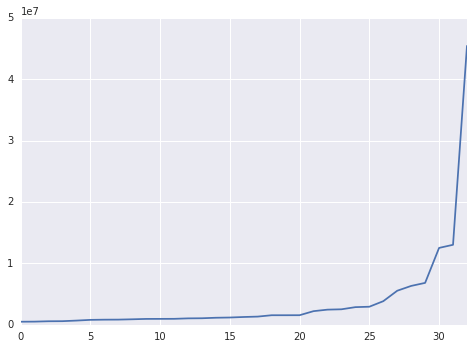

In [40]:
# Records broken down by Borough/SchoolDist combination 
pd.Series(np.sort(exd.pivot_table(index=['Borough', 'SchoolDist'])['SalePrice'])).plot()

In [41]:
data.head(5)

,Borough,Block,Lot,SalePrice,LandSquareFeet,MarketValueSqFt,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,CurFvT,NewFvT,CuravtA,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11517,Manhattan,972.0,1.0,4.111112e+09,2675000.0,459.744000,106.0,44.00,5005.0,2.0,4.0,10009.0,E005,13.0,6000.0,240 1 AVENUE,R7-2,C1-7,NaN,NaN,C1-5,NaN,NaN,NaN,NaN,C1-5/R7-2,C1-7,Y,D7,4.0,0.0,P,ST-DIL LLC,2675000.0,8942176.0,574234.0,8367942.0,16820.0,77414.0,480000.0,0.0,0.0,0.0,7.0,36.0,13.0,8756.0,8800.0,1362.00,2023.00,1362.00,2023.00,NaN,0.0,Y,3.0,5.0,117450000.0,569465100.0,0.0,0.0,1945.0,NaN,0.0,0.0,NaN,NaN,3.34,3.44,0.0,6.5,1.0,1.009720e+09,0.0,44.0,990376.0,205864.0,12c,NaN,102 040,10310.0,NaN,0.000000e+00,NaN,1.0,15v1,1.265478e+09,1.360162e+09,569465100.0,63.683057,141.517903,152.106378
11521,Manhattan,1004.0,20.0,1.932900e+09,80333.0,1179.577905,105.0,131.00,1002.0,2.0,4.0,10019.0,E023,18.0,4700.0,787 7 AVENUE,C6-6,C6-6.5,NaN,NaN,NaN,NaN,MID,NaN,NaN,C6-6/MID,C6-6.5,Y,O4,5.0,0.0,NaN,"787 HOLDINGS, LLC",80333.0,1638637.0,1633544.0,5093.0,1553937.0,49000.0,27016.0,2591.0,0.0,1000.0,7.0,1.0,51.0,0.0,48.0,200.83,400.00,201.00,400.00,NaN,2.0,N,3.0,2.0,123750000.0,337494600.0,0.0,0.0,1985.0,NaN,0.0,0.0,NaN,NaN,20.40,10.00,15.0,15.0,1.0,1.010040e+09,0.0,131.0,989293.0,216783.0,8c,NaN,105N060,10401.0,NaN,1.010040e+09,12/11/1986,1.0,15v1,7.271111e+08,7.652030e+08,327200000.0,199.678147,443.729216,466.975297
11642,Manhattan,1272.0,39.0,1.775000e+09,26300.0,5092.087899,105.0,112.01,1003.0,2.0,4.0,10019.0,E023,18.0,4800.0,730 5 AVENUE,C5-3,C5-P,NaN,NaN,NaN,NaN,MID,NaN,NaN,C5-3/MID,C5-P,Y,O3,5.0,0.0,P,"730 FIFTH RETAIL, LLC",26300.0,348580.0,348580.0,0.0,327260.0,21300.0,0.0,10.0,0.0,10.0,7.0,1.0,25.0,0.0,75.0,100.42,225.00,100.00,225.00,NaN,2.0,Y,3.0,2.0,51750000.0,138181050.0,0.0,0.0,1921.0,NaN,1986.0,0.0,NaN,NaN,13.25,10.00,15.0,15.0,1.0,1.012720e+09,0.0,11201.0,991323.0,217212.0,8c,NaN,106W034,10502.0,NaN,0.000000e+00,NaN,1.0,15v1,3.070690e+08,3.407360e+08,138181050.0,396.411297,880.913994,977.497275
11518,Manhattan,978.0,1.0,1.345485e+09,828650.0,430.946160,106.0,60.00,1003.0,2.0,4.0,10010.0,E005,13.0,6000.0,342 1 AVENUE,R7-2,C1-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R7-2,C1-7,Y,D6,4.0,0.0,P,PCV ST-DIL LLC,828650.0,3122165.0,19609.0,3102556.0,3419.0,16190.0,0.0,0.0,0.0,0.0,7.0,21.0,15.0,2491.0,2498.0,650.00,547.42,71.50,182.42,NaN,0.0,Y,5.0,5.0,32941350.0,165433050.0,0.0,0.0,1947.0,NaN,0.0,0.0,NaN,NaN,3.77,3.44,0.0,6.5,1.0,1.009780e+09,0.0,60.0,990629.0,207012.0,12c,NaN,102 050,10310.0,NaN,0.000000e+00,NaN,1.0,15v1,3.676290e+08,4.124770e+08,165433050.0,52.986645,117.748101,132.112492
11660,Manhattan,1306.0,23.0,5.100000e+08,32625.0,816.152784,106.0,100.00,2004.0,2.0,4.0,10022.0,E008,17.0,4800.0,575 LEXINGTON AVENUE,C6-6,C6-4.5,NaN,NaN,NaN,NaN,MID,NaN,NaN,C6-6/MID,C6-4.5,Y,O4,5.0,0.0,P,MAPLE REEP - OFC 575,32625.0,624883.0,624883.0,0.0,564429.0,20000.0,34847.0,5607.0,0.0,0.0,7.0,1.0,34.0,0.0,38.0,150.42,225.00,150.42,225.00,NaN,0.0,Y,3.0,2.0,18720000.0,76611600.0,0.0,0.0,1958.0,NaN,1990.0,2012.0,NaN,NaN,19.15,10.00,15.0,15.0,1.0,1.013060e+09,0.0,100.0,992209.0,215143.0,8d,NaN,104 050,10504.0,NaN,0.000000e+00,NaN,1.0,15v1,1.702480e+08,1.805690e+08,76611600.0,122.601511,272.447

In [42]:
set(['Borough', 'SchoolDist', 'SalePrice']) & set(data.columns)

{'Borough', 'SalePrice', 'SchoolDist'}

In [44]:
# What is the outlier?
# This recreates the pivot table using a groupby (you can also do it using hierarchical indexing I think).
pivot = data[['Borough', 'SalePrice', 'SchoolDist']].groupby(['Borough', 'SchoolDist']).max()
# Now let's get the record in the base dataset associated with the combo with the highest average SalePrice.
# pivot['SalePrice'].iloc[int(np.argmax(pivot['SalePrice'])[1])] # not quite it!
pivot.ix[pivot['SalePrice'].idxmax()]

SalePrice    4.111112e+09
Name: (Manhattan, 2.0), dtype: float64

In [45]:
np.argmax(pivot['SalePrice'])[1]

2.0

In [46]:
data[data['SalePrice'] == pivot.ix[pivot['SalePrice'].idxmax()]['SalePrice']]

,Borough,Block,Lot,SalePrice,LandSquareFeet,MarketValueSqFt,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,CurFvT,NewFvT,CuravtA,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11517,Manhattan,972.0,1.0,4.111112e+09,2675000.0,459.744,106.0,44.0,5005.0,2.0,4.0,10009.0,E005,13.0,6000.0,240 1 AVENUE,R7-2,C1-7,NaN,NaN,C1-5,NaN,NaN,NaN,NaN,C1-5/R7-2,C1-7,Y,D7,4.0,0.0,P,ST-DIL LLC,2675000.0,8942176.0,574234.0,8367942.0,16820.0,77414.0,480000.0,0.0,0.0,0.0,7.0,36.0,13.0,8756.0,8800.0,1362.0,2023.0,1362.0,2023.0,NaN,0.0,Y,3.0,5.0,117450000.0,569465100.0,0.0,0.0,1945.0,NaN,0.0,0.0,NaN,NaN,3.34,3.44,0.0,6.5,1.0,1.009720e+09,0.0,44.0,990376.0,205864.0,12c,NaN,102 040,10310.0,NaN,0.0,NaN,1.0,15v1,1.265478e+09,1.360162e+09,569465100.0,63.683057,141.517903,152.106378


Throwing this address into Google Maps reveals that `240 1 AVENUE` is one of the Stuyvesant Town housing blocks. The accounts for the really high average sale price! Since it's also a single unit.

By the way, the price paid for this block was quite a bit higher than expected...

In [47]:
data[0:500].set_index('Address').groupby(len).sum()

,Block,Lot,SalePrice,LandSquareFeet,MarketValueSqFt,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,PolicePrct,HealthArea,ZoneDist4,LandUse,Easements,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,ProxCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,TaxMap,APPBBL,PLUTOMapID,CurFvT,NewFvT,CuravtA,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt
10,470.0,53.0,4.684996e+07,7716.0,8056.742046,102.0,41.00,2000.0,2.0,1.0,10013.0,5.0,6800.0,NaN,5.0,0.0,2662.0,5815.0,5815.0,0.0,0.0,1938.0,0.0,3877.0,0.0,0.0,7.0,1.0,3.5,0.0,4.0,26.67,102.33,26.00,100.00,3.0,5.0,2.0,229500.0,5.980500e+05,0.0,0.0,1900.0,0.0,0.0,2.18,3.44,6.0,6.50,1.0,1.004700e+09,0.0,41.0,985683.0,201336.0,10206.0,0.000000e+00,1.0,1.329000e+06,4.292000e+06,5.980500e+05,102.846088,228.546862,738.091144
11,1567.0,69.0,1.363000e+08,43669.0,12515.918606,613.0,170.03,7008.0,19.0,44.0,41275.0,95.0,22900.0,NaN,19.0,0.0,23751.0,46951.0,36035.0,10916.0,0.0,7887.0,0.0,10460.0,17688.0,0.0,28.0,4.0,16.0,10.0,20.0,264.83,407.34,210.92,395.00,8.0,17.0,8.0,1318050.0,4.054500e+06,0.0,0.0,7678.0,2012.0,2012.0,12.72,22.04,28.0,30.40,6.0,6.015670e+09,0.0,5222.0,3942151.0,793415.0,60719.0,4.009220e+09,4.0,9.010000e+06,1.174100e+07,4.054500e+06,460.363280,1023.029512,1181.516822
12,34762.0,1010.0,1.187036e+10,4020659.0,102233.304954,4560.0,3380.06,69157.0,125.0,236.0,365307.0,708.0,193910.0,NaN,168.0,0.0,4017041.0,16747060.0,4544800.0,12202260.0,3181526.0,392758.0,512304.0,50485.0,302000.0,105727.0,252.0,103.0,364.0,12070.0,12604.0,5447.88,6830.15,4578.00,6179.16,69.0,140.0,82.0,444500911.0,1.616939e+09,32200490.0,68505140.0,69542.0,39745.0,6032.0,220.79,250.73,264.8,340.32,44.0,4.434762e+10,0.0,23978.0,35587905.0,7442238.0,453080.0,3.028170e+09,36.0,3.574492e+09,3.820656e+09,1.605728e+09,6495.561025,16166.235040,16743.510891
13,52418.0,753.0,2.316926e+09,906380.0,95691.424716,4265.0,5128.02,84092.0,146.0,292.0,344969.0,855.0,123580.0,NaN,158.0,1.0,892501.0,3667650.0,2129542.0,1538108.0,1199808.0,175148.0,508403.0,1040.0,0.0,245143.0,238.0,44.0,267.0,1761.0,1933.0,3940.59,5885.91,2971.58,3025.16,53.0,121.0,89.0,58715868.0,2.729244e+08,1760400.0,7109172.0,65762.0,29827.0,5992.0,192.26,216.81,111.0,273.30,40.0,4.052418e+10,0.0,19584.0,33767728.0,7515637.0,418632.0,0.000000e+00,34.0,6.153000e+08,6.470170e+08,2.725856e+08,4723.649637,11655.321433,12499.308941
14,18488.0,164.0,5.263873e+08,419899.0,11390.170600,3236.0,2060.00,17075.0,200.0,299.0,110516.0,844.0,35930.0,NaN,54.0,0.0,419899.0,1300972.0,1219643.0,81329.0,36260.0,57476.0,257402.0,141800.0,726705.0,0.0,70.0,22.0,39.0,80.0,153.0,1950.26,1975.37,1474.75,1276.84,4.0,35.0,45.0,9069246.0,4.076112e+07,414901.0,5252176.0,19416.0,8024.0,0.0,28.29,26.54,24.8,44.00,32.0,3.218488e+10,0.0,2060.0,9935800.0,1981304.0,326637.0,1.002877e+10,10.0,1.023620e+08,1.028660e+08,4.076292e+07,624.306302,3652.300723,4425.804706
15,32859.0,640.0,1.162706e+09,869048.0,35395.020957,7770.0,3438.04,60189.0,476.0,542.0,290849.0,1916.0,79223.0,NaN,123.0,2.0,896401.0,2772271.0,1817838.0,954433.0,1543464.0,65418.0,99289.0,35800.0,27603.0,46264.0,189.0,36.0,177.0,1055.0,1161.0,3354.82,4635.81,2663.17,3054.42,26.0,107.0,82.0,55599289.0,1.993044e+08,331793.0,24610452.0,50516.0,23948.0,3994.0,124.39,123.63,121.0,177.50,77.0,7.732859e+10,0.0,132340.0,26892241.0,5464599.0,785096.0,1.400908e+10,27.0,4.536000e+08,4.745183e+08,1.981218e+08,1607.173081,5612.144444,5742.056620
16,64189.0,1082.0,1.689570e+09,794910.0,105504.403409,7163.0,7398.18,90172.0,302.0,476.0,406977.0,1411.0,193381.0,NaN,180.0,0.0,785910.0,1961410.0,996330.0,965080.0,357332.0,254139.0,278200.0,94709.0,11950.0,0.0,273.0,101.0,235.0,1038.0,1216.0,3323.48,4690.41,2606.84,3572.00,69.0,163.0,112.0,34465803.0,1.400975e+08,8811349.0,4197729

In [5]:
pluto = pd.read_csv("nyc_pluto.csv")

/Users/Honors/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (16,17,19,20,21,22,28,63,64,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
pluto[:1000].groupby(['OwnerName'])[['OwnerName', 'Address', 'BldgArea']].apply(lambda df: df.sort_values(by='BldgArea')[:1])

,,OwnerName,Address,BldgArea
OwnerName,,,,
1 PARK ROW LLC,475,1 PARK ROW LLC,1 PARK ROW,42200.0
"10 SSA LANDLORD, LLC",6,"10 SSA LANDLORD, LLC",10 SOUTH STREET,158197.0
"10-12 MLANE, LLC",317,"10-12 MLANE, LLC",8 MAIDEN LANE,6814.0
100 CHURCH FEE OWNER,644,100 CHURCH FEE OWNER,50 PARK PLACE,918240.0
100 WALL STREET PROPE,216,100 WALL STREET PROPE,100 WALL STREET,463664.0
102 GREENWICH REALTY,277,102 GREENWICH REALTY,102 GREENWICH STREET,2171.0
102-110 JOHN MAZAL LL,354,102-110 JOHN MAZAL LL,102 JOHN STREET,4615.0
105 CHAMBERS ST ASSOC,849,105 CHAMBERS ST ASSOC,105 CHAMBERS STREET,53570.0
105 SOUTH STREET DEVE,543,105 SOUTH STREET DEVE,106 SOUTH STREET,22236.0


In [ ]:
# np.isin() is a simplifying set identity tool which eases some earlier issues of mine!
# Use dict.get() instead of dict['key] in order to allow values to pass through, so you don't have to write a case
# into an expression for when the value is not in the dict.